# Прогнозирование отмен бронирований отелей
- Предметная область: Гостиничный бизнес и онлайн-бронирование.
- Источник: https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset
- Тип данных: Синтезированные

Набор применим для:
- Регрессии: Прогнозирование, выполнит ли клиент бронирование или отменит его.

Атрибуты представленные в датаcете:

| Тип данных | Признак                              | Описание                                                                                                 | Пример       |
|------------|--------------------------------------|----------------------------------------------------------------------------------------------------------|--------------|
| string     | Booking_ID                           | Уникальный идентификатор каждого бронирования                                                            | INN18138     |
| int        | no_of_adults                         | Количество взрослых                                                                                      | 2            |
| int        | no_of_children                       | Количество детей                                                                                         | 1            |
| int        | no_of_weekend_nights                 | Количество выходных ночей (суббота или воскресенье), которые гость провел или забронировал в отеле       | 2            |
| int        | no_of_week_nights                    | Количество ночей в будние дни (с понедельника по пятницу), которые гость провел или забронировал в отеле | 3            |
| string     | type_of_meal_plan                    | Тип забронированного клиентом плана питания                                                              | Meal Plan 1  |
| int        | required_car_parking_space           | Требуется ли клиенту парковочное место? (0 - Нет, 1 - Да)                                                | 1            |
| string     | room_type_reserved                   | Тип забронированного клиентом номера. Значения зашифрованы INN Hotels                                    | Room_Type 1  |
| int        | lead_time                            | Количество дней между датой бронирования и датой прибытия                                                | 30           |
| int        | arrival_year                         | Год прибытия                                                                                             | 2023         |
| int        | arrival_month                        | Месяц прибытия (1-12)                                                                                    | 4            |
| int        | arrival_date                         | Дата месяца прибытия                                                                                     | 15           |
| string     | market_segment_type                  | Назначение рыночного сегмента                                                                            | Aviation     |
| int        | repeated_guest                       | Является ли клиент повторным гостем? (0 - Нет, 1 - Да)                                                   | 0            |
| int        | no_of_previous_cancellations         | Количество предыдущих бронирований, которые были отменены клиентом до текущего бронирования              | 1            |
| int        | no_of_previous_bookings_not_canceled | Количество предыдущих бронирований, которые не были отменены клиентом до текущего бронирования           | 2            |
| float      | avg_price_per_room                   | Средняя цена за день бронирования; цены на номера динамические. (в евро)                                 | 100.50       |
| int        | no_of_special_requests               | Общее количество специальных запросов, сделанных клиентом (например, высокий этаж, вид из окна и т.д.)   | 3            |
| string     | booking_status                       | Флаг, указывающий, было ли бронирование отменено или нет                                                 | Not_Canceled |

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv(r"C:\Users\super\OneDrive\Документы\Space\Study\MachineLearning\Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [3]:
df.info()
df['market_segment_type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

array(['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary'],
      dtype=object)

Можно заметить, что нет пропущенных значений в каждом стобце, также можно удалить ключ Booking_ID за её ненадобностью.

In [4]:
df = df.drop(columns=['Booking_ID'])

Преобразуем строковые данные в числовые значения с помощью LabelEncoder

In [5]:
le = LabelEncoder()
df['type_of_meal_plan'] = le.fit_transform(df['type_of_meal_plan'])
df['room_type_reserved'] = le.fit_transform(df['room_type_reserved'])
df['market_segment_type'] = le.fit_transform(df['market_segment_type'])
df['booking_status'] = le.fit_transform(df['booking_status'])
df

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,0,94.50,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,0,3,85,2018,8,3,4,0,0,0,167.80,1,1
36271,2,0,1,3,0,0,0,228,2018,10,17,4,0,0,0,90.95,2,0
36272,2,0,2,6,0,0,0,148,2018,7,1,4,0,0,0,98.39,2,1
36273,2,0,0,3,3,0,0,63,2018,4,21,4,0,0,0,94.50,0,0


Выведем средние значение и стандартное отклонение

In [6]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.515644,0.030986,0.708890,85.232557,2017.820427,7.423653,15.596995,3.552447,0.025637,0.023349,0.153411,103.423539,0.619655,0.672364
std,0.518715,0.402648,0.870644,1.410905,1.048131,0.173281,1.399851,85.930817,0.383836,3.069894,8.740447,0.681536,0.158053,0.368331,1.754171,35.089424,0.786236,0.469358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,3.000000,0.000000,0.000000,0.000000,80.300000,0.000000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,4.000000,0.000000,0.000000,0.000000,99.450000,0.000000,1.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,0.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,4.000000,0.000000,0.000000,0.000000,120.000000,1.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,3.000000,1.000000,6.000000,443.000000,2018.000000,12.000000,31.000000,4.000000,1.000000,13.000000,58.000000,540.000000,5.000000,1.000000


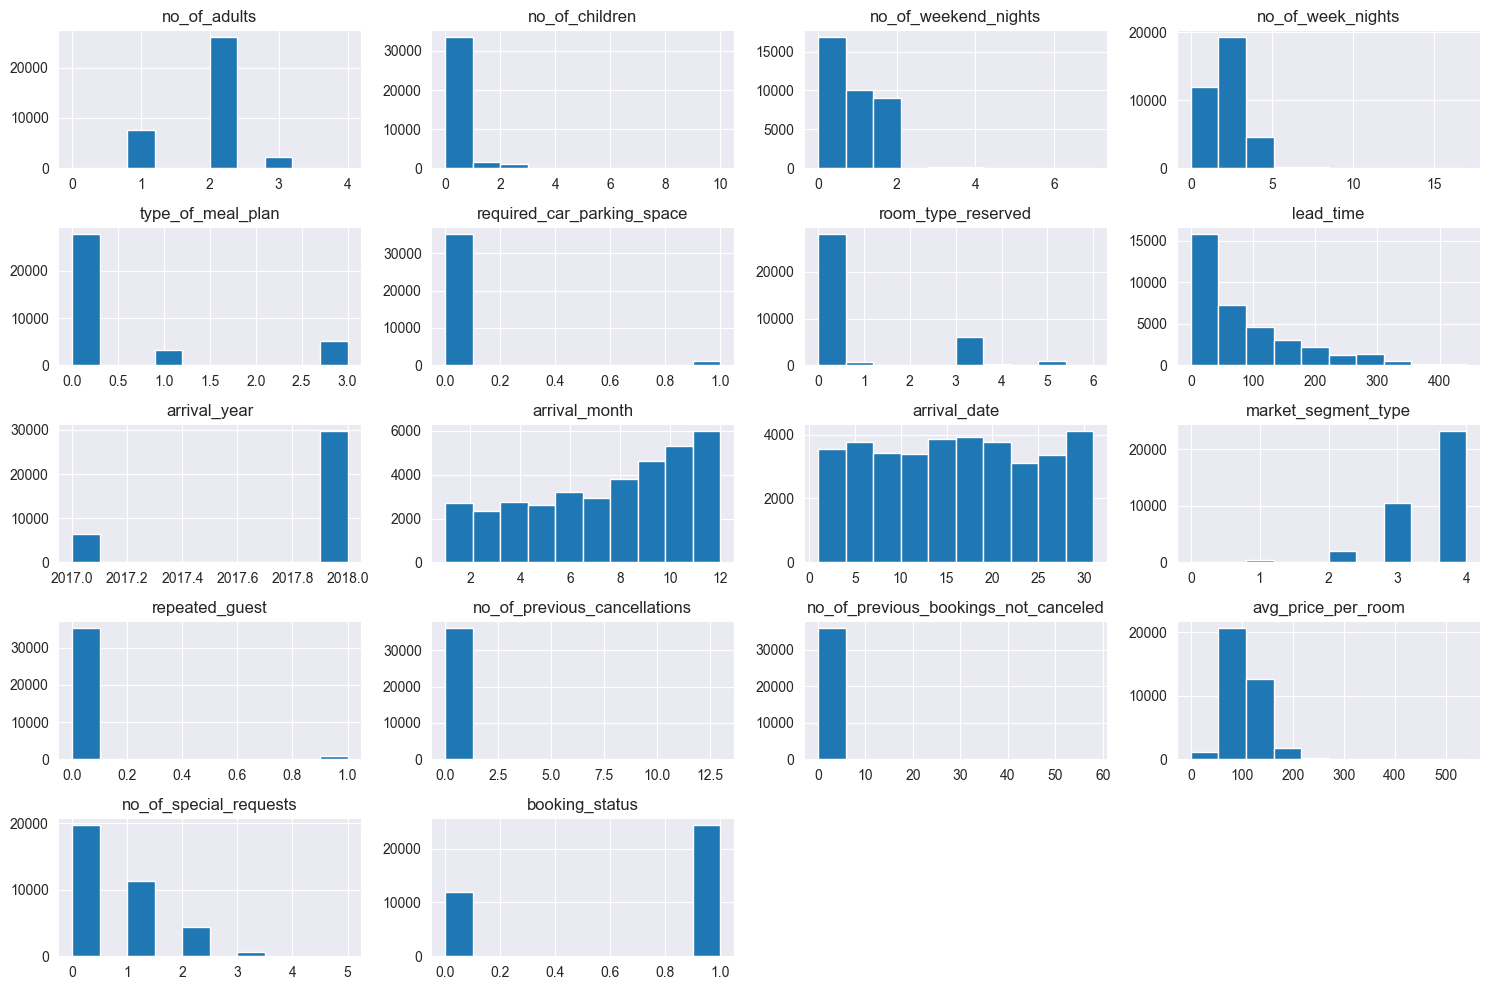

In [7]:
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

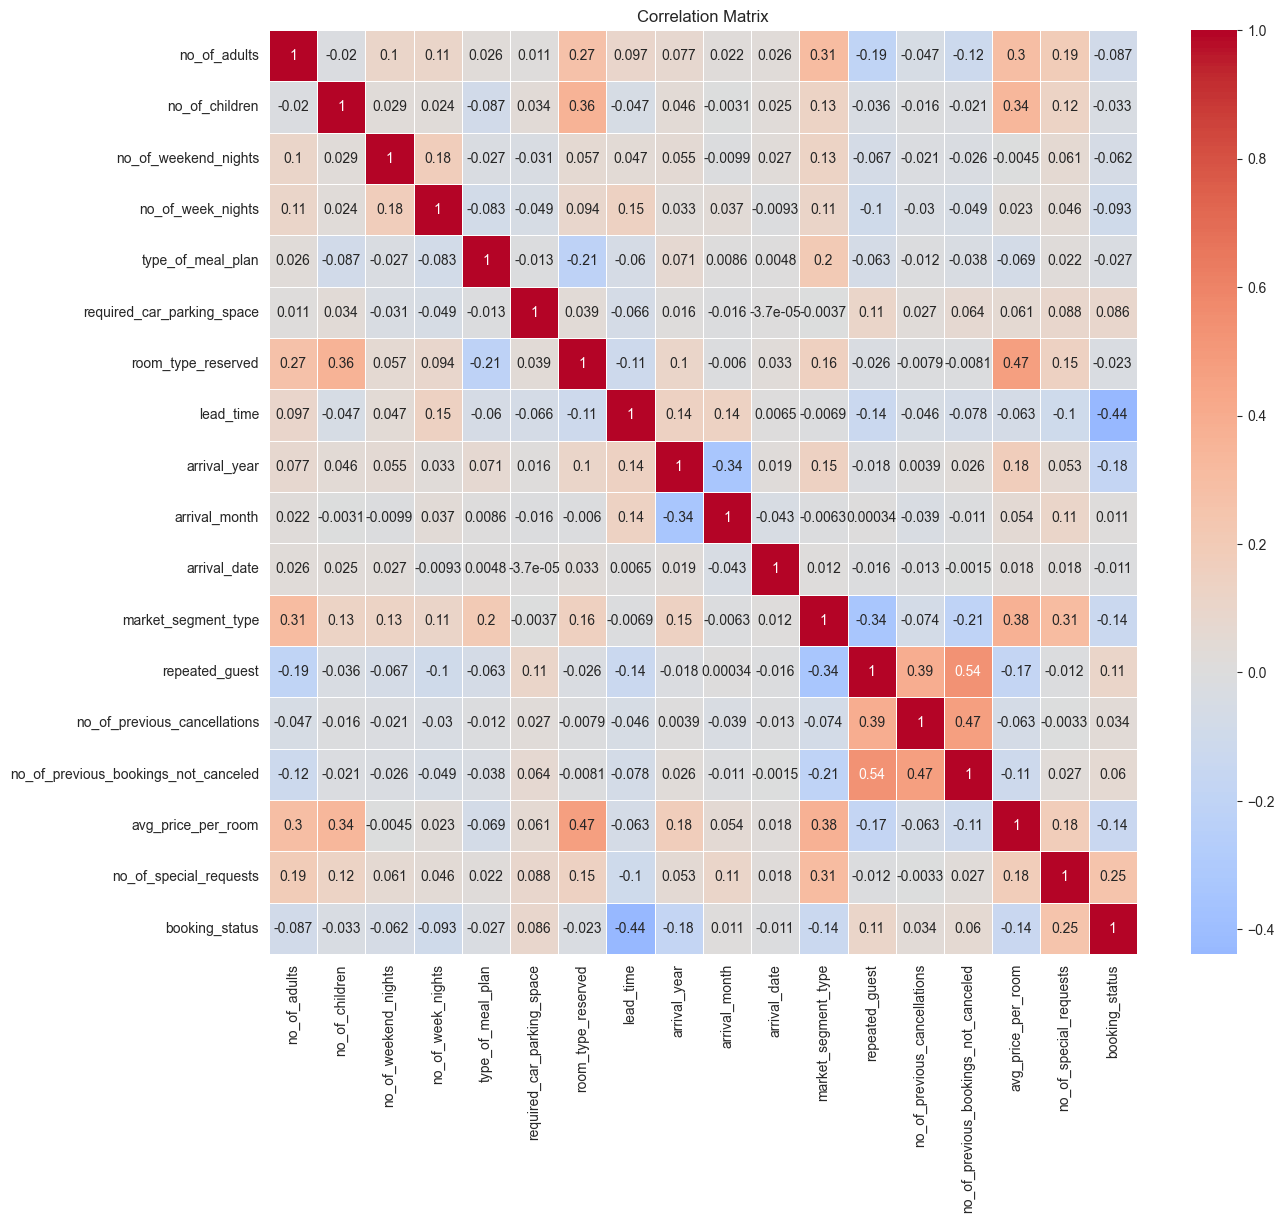

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.019787,0.103316,0.105622,0.025555,0.011429,0.270348,0.097287,0.076719,0.021841,0.026338,0.314103,-0.192277,-0.047426,-0.119166,0.296886,0.189401,-0.086920
no_of_children,-0.019787,1.000000,0.029478,0.024398,-0.086764,0.034244,0.364073,-0.047091,0.045983,-0.003076,0.025482,0.130618,-0.036348,-0.016390,-0.021189,0.337728,0.124486,-0.033078
no_of_weekend_nights,0.103316,0.029478,1.000000,0.179577,-0.027327,-0.031111,0.057368,0.046595,0.055357,-0.009894,0.027304,0.129069,-0.067107,-0.020690,-0.026312,-0.004525,0.060593,-0.061563
no_of_week_nights,0.105622,0.024398,0.179577,1.000000,-0.083431,-0.048784,0.094125,0.149650,0.032672,0.037376,-0.009305,0.112952,-0.099764,-0.030080,-0.049344,0.022753,0.045994,-0.092996
type_of_meal_plan,0.025555,-0.086764,-0.027327,-0.083431,1.000000,-0.012991,-0.209176,-0.060271,0.071396,0.008564,0.004833,0.203361,-0.062995,-0.011622,-0.038183,-0.069257,0.022091,-0.026706
required_car_parking_space,0.011429,0.034244,-0.031111,-0.048784,-0.012991,1.000000,0.038778,-0.066445,0.015684,-0.015505,-0.000037,-0.003723,0.110909,0.027106,0.063810,0.061304,0.087922,0.086185
room_type_reserved,0.270348,0.364073,0.057368,0.094125,-0.209176,0.038778,1.000000,-0.107793,0.103369,-0.005967,0.032919,0.156610,-0.025826,-0.007936,-0.008139,0.469899,0.145041,-0.022986
lead_time,0.097287,-0.047091,0.046595,0.149650,-0.060271,-0.066445,-0.107793,1.000000,0.143439,0.136814,0.006479,-0.006933,-0.135984,-0.045723,-0.078137,-0.062596,-0.101645,-0.438538
arrival_year,0.076719,0.045983,0.055357,0.032672,0.071396,0.015684,0.103369,0.143439,1.000000,-0.339689,0.018849,0.150027,-0.018175,0.003919,0.026422,0.178605,0.053205,-0.179529
arrival_month,0.021841,-0.003076,-0.009894,0.037376,0.008564,-0.015505,-0.005967,0.136814,-0.339689,1.000000,-0.042780,-0.006311,0.000341,-0.038615,-0.010718,0.054423,0.110552,0.011233


In [8]:
plt.figure(figsize=(14, 12))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()
correlation_matrix

1. **no_of_adults/market_segment_type (0.31)**:
    - Это может означать, что разные сегменты рынка привлекают разное кол-во взрослых.
2. **no_of_children/avg_price_per_room (0.33)**:
    - Семьи с детьми предпочитают бронировать более дорогие номера, так как им нужно больше мест.
3. **room_type_reserved/no_of_children (0.36)**:
    - Определенные (больше мест) типы номеров чаще бронируются семьями с детьми.
4. **room_type_reserved/avg_price_per_room (0.47)**:
    - Определенные типы номеров стоят дороже.
5. **lead_time/booking_status (-0.44)**:
    - Бронирования, сделанные за долгое время до прибытия, чаще отменяются.
6. **arrival_year/arrival_month (-0.34)**:
    - Связь с сезонными тенденциями или изменениями в предпочтениях клиентов со временем.
7. **market_segment_type/avg_price_per_room (0.38)**:
    - Разные сегменты рынка могут быть ориентированы на разные ценовые категории.
8. **market_segment_type/no_of_special_requests (0.31)**:
    - Некоторые сегменты рынка могут быть более склонны делать специальные запросы.
9. **market_segment_type/repeated_guest (-0.34)**:
    - Определенные сегменты рынка менее склонны привлекать повторных гостей.
10. **repeated_guest/no_of_previous_cancellations (0.39)**:
    - Повторные гости могут иметь более гибкий график и чаще отменять бронирования.
11. **repeated_guest/no_of_previous_bookings_not_canceled (0.54)**:
    - Существует умеренная положительная корреляция между повторными гостями и количеством предыдущих бронирований, которые не были отменены. Это может свидетельствовать о лояльности таких гостей.
12. **no_of_previous_cancellations/no_of_previous_bookings_not_canceled (0.47)**:
    - Существует умеренная положительная корреляция между количеством предыдущих отмен и количеством предыдущих бронирований, которые не были отменены. Это может означать, что гости, которые часто бронируют, также могут часто отменять бронирования.

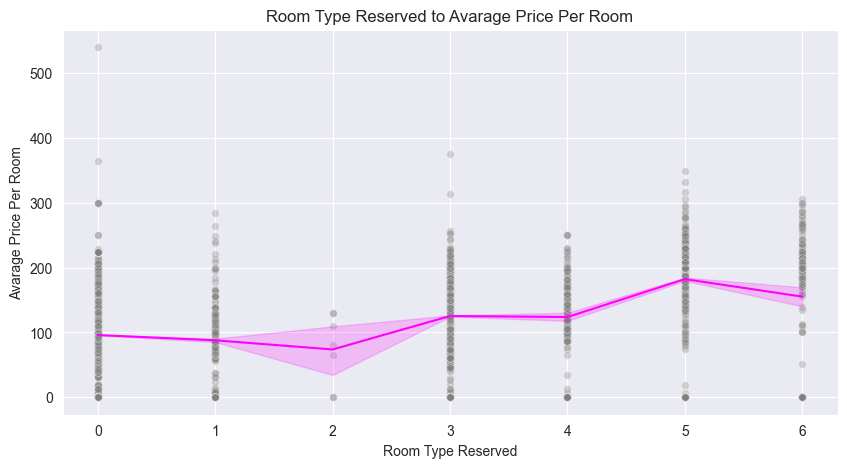

In [9]:
# Age to Experience correlation research
plt.figure(figsize=(10, 5))

sns.scatterplot(x="room_type_reserved", y="avg_price_per_room", data=df, color="gray", alpha=0.3, s=30)
sns.lineplot(x="room_type_reserved", y="avg_price_per_room", data=df, color="magenta")

plt.xlabel("Room Type Reserved")
plt.ylabel("Avarage Price Per Room")
plt.title("Room Type Reserved to Avarage Price Per Room")
plt.show()


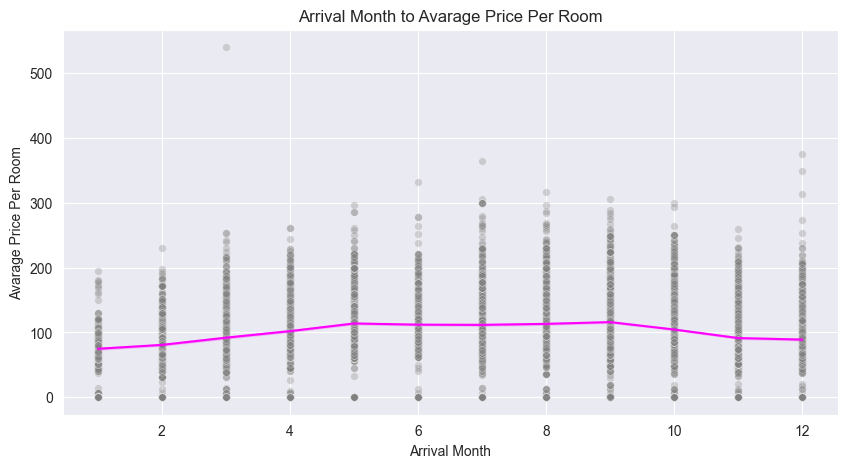

In [10]:
# Age to Experience correlation research

plt.figure(figsize=(10, 5))
sns.scatterplot(x="arrival_month", y="avg_price_per_room", data=df, color="gray", alpha=0.3, s=30)
sns.lineplot(x="arrival_month", y="avg_price_per_room", data=df, color="magenta")

plt.xlabel("Arrival Month")
plt.ylabel("Avarage Price Per Room")
plt.title("Arrival Month to Avarage Price Per Room")

plt.show()

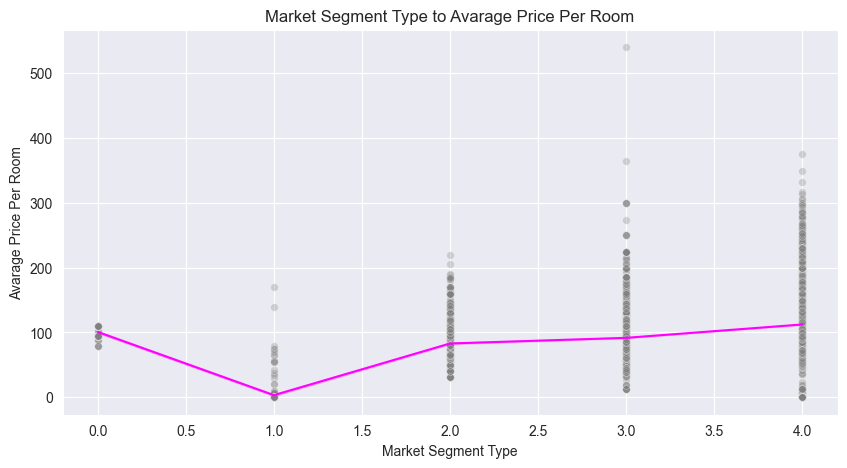

In [11]:
# Age to Experience correlation research

plt.figure(figsize=(10, 5))
sns.scatterplot(x="market_segment_type", y="avg_price_per_room", data=df, color="gray", alpha=0.3, s=30)
sns.lineplot(x="market_segment_type", y="avg_price_per_room", data=df, color="magenta")

plt.xlabel("Market Segment Type")
plt.ylabel("Avarage Price Per Room")
plt.title("Market Segment Type to Avarage Price Per Room")

plt.show()

**Вывод:** различные аспекты бронирования (такие как сегмент рынка, количество взрослых и детей, тип номера, цена, время до прибытия и история бронирований) взаимосвязаны и влияют на поведение клиентов. В частности, сегментация рынка и типы номеров играют ключевую роль в определении цен и предпочтений клиентов, а повторные гости демонстрируют определенные паттерны поведения, такие как лояльность и склонность к отменам.